<h4 align ='center'>Kushagra Singh | Infosys Project</h4>
<h4 align ='center'>Using MNIST Dataset and MLP, CNN & LeNet5 models</h4>
<br>

In [4]:
%pip install torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [2]:
import torch
import torchvision
from torchvision import datasets

dataset = torchvision.datasets.MNIST(root='./data', download=True)

print(f"Dataset size: {len(dataset)}")
print(f"First data point (image, label): {dataset[0]}")

Dataset size: 60000
First data point (image, label): (<PIL.Image.Image image mode=L size=28x28 at 0x1FA2FBE29C0>, 5)


Epoch [1/5], Loss: 0.9833
Epoch [2/5], Loss: 0.5198
Epoch [3/5], Loss: 0.3251
Epoch [4/5], Loss: 0.2704
Epoch [5/5], Loss: 0.3437
Accuracy of the Multi-Layer Perceptron model on the test images: 86.44%


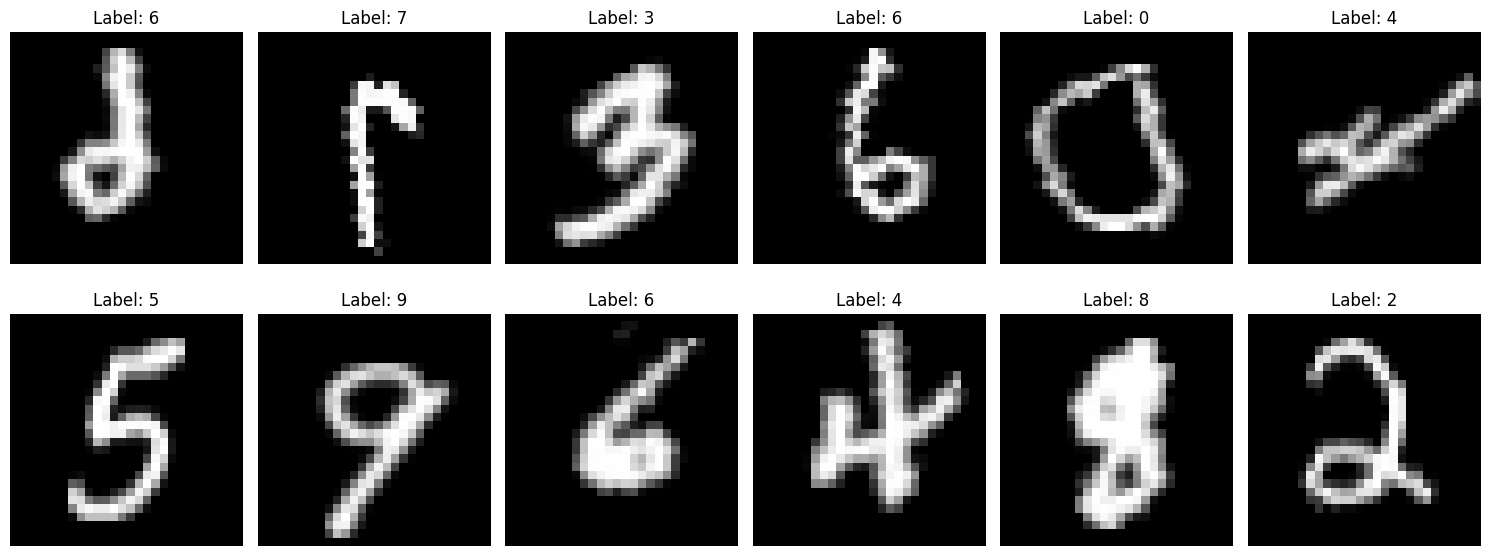

In [6]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.transforms as T
import torch.nn as nn
import torch.optim as optim

#to customize data visualization
data_transforms = T.Compose([
    T.RandomRotation(degrees=30),
    T.RandomHorizontalFlip(),
    T.RandomResizedCrop(size=28, scale=(0.9, 1.0)),
    T.ToTensor(),
    T.Normalize(mean=(0.5,), std=(0.5,)),
])

#load
mnist_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=data_transforms, download=True)
mnist_dataloader = DataLoader(mnist_dataset, batch_size=60, shuffle=True)

#defining the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  #first hidden layer
        self.fc2 = nn.Linear(hidden_size, num_classes)  #output layer
        self.relu = nn.ReLU()  #activation function

    def forward(self, x):
        x = x.view(x.size(0), -1)  #flatten input
        x = self.fc1(x)  #first layer
        x = self.relu(x)  #activation
        x = self.fc2(x)  #output layer
        return x

#set up training parameters
input_size = 28 * 28  #images
hidden_size = 128
num_classes = 10
num_epochs = 5
learning_rate = 0.001

#creating an instance of the model, define the loss function and optimizer
model = MLP(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#train the model
for epoch in range(num_epochs):
    for images, labels in mnist_dataloader:
        #forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward pass and optimization
        optimizer.zero_grad()  #clear gradients
        loss.backward()  #backpropagation
        optimizer.step()  #update weights
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

#evaluate the model
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=T.ToTensor(), download=True)
test_loader = DataLoader(test_dataset, batch_size=60, shuffle=False)

model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the Multi-Layer Perceptron model on the test images: {100 * correct / total:.2f}%')

#viz representation changes
def plot_image_grid(images, labels, num_rows=2, num_cols=6):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 6))
    axes = axes.flatten()
    
    for idx in range(num_rows*num_cols):
        if idx < len(images):
            axes[idx].imshow(images[idx].squeeze(), cmap='gray')
            axes[idx].set_title(f'Label: {labels[idx]}')
        axes[idx].axis('off')    
    plt.tight_layout()
    plt.show()

#batch of images and labels
data_iterator = iter(mnist_dataloader)
batch_images, batch_labels = next(data_iterator)

#visualize batch of images
plot_image_grid(batch_images, batch_labels)
